# Week 2

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

## Introduction to computer vision

Computer vision is labeled the data, and identify objects from real world. 
The example given is tran a neuron to recognize the type of clothes. The images are transformed into pixeles with a grayscale from 1 to 255 to reduces the weight of the data, the images are 28 x 28 pixels 

The fashion MINST dataset is a collection of grayscale 28x28 pixels clothing images. Each one with a label associated as follows:


In [10]:

d = {'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
     'Description': ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]}

df = pd.DataFrame(data = d, index = d["Label"])

In [12]:
df.head(10)

,Label,Description
0,0,T-shirt/top
1,1,Trousers
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


We import the dataset directly from keras

In [13]:
fmnist = tf.keras.datasets.fashion_mnis

The load_data object with give us two tuples with two list each one

In [14]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


label : 9

Image pixel array: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   

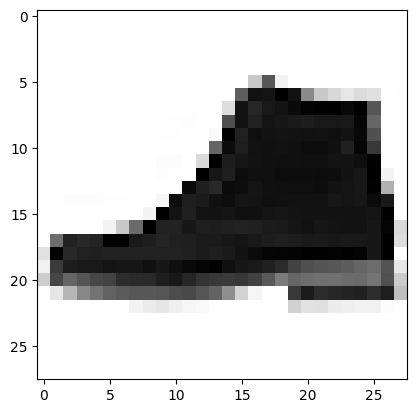

In [18]:
import matplotlib.pyplot as plt

#we can modify from 0 to 59999
index = 42

#set the number of characters per row when printing
np.set_printoptions(linewidth = 320)

#print the label and image
print(f'label : {training_labels[index]}')
print(f'\nImage pixel array: \n {training_images[index]}')

#Visualize image
plt.imshow(training_images[index], cmap = 'Greys')

#The scla eis from 0 to 255

The values along the arrays are from 0 to 255, when we are training a neural network specially in image processing, for various reasons use and scale from 0 to 1 is easier for the model to learn. We call this process normalization. To normalize we use the next code:

In [19]:
training_images = training_images / 255 #cause the scale is from 0 to 255

test_images = test_images / 255 

We split the dataset into test and train arrays to train and validate our model after the training process.

Now, lets create the model

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), #the number of pixels contained in the image
    tf.keras.layers.Dense(128, activation = tf.nn.relu), #provide values above 0 
    tf.keras.layers.Dense(10, activation = tf.nn.softmax) #assign a probability to each label
])

The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [33]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5077 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3804 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3150 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8913


In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3487 - accuracy: 0.8737


[0.34874218702316284, 0.8737000226974487]

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [35]:
#we create the callback class to create our callback 

class myCallback(tf.keras.callbacks.Callback):
  
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6):                     #Experiment with changing this value, depends on necessity
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()                                 #We create a callback 


#Everythings keep similar until the fit part 

fmnist = tf.keras.datasets.fashion_mnist                                                #import the dataset
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()   #assign to train and test arrays

training_images  = training_images / 255.0                                              #Normalize the data
test_images      = test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),                                                            #Transform the 28x28 into a single array
  tf.keras.layers.Dense(512, activation=tf.nn.relu),                                    #use values 0 and greater than 0
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])            #use our callback to stop the training process

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.4758 - accuracy: 0.8298
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4758 - accuracy: 0.8299


## CallBacks

We are goint to used the previous dataset from tensorflow (clothing mnist)

In [36]:
import tensorflow as tf

In [37]:
fmnist = tf.keras.datasets.fashion_mnist

#Separate the arrays for train and test split 
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

#normalize the x's values in each array 
x_train, x_test = x_train / 255, x_test / 255

In [44]:
#we define our callback class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 0.4):
            print('\nLoss is lower than 0.4 so cancelling training')
            self.model.stop_training = True

#We initialize our class
callbacks = myCallback()

In [45]:
#Define the model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu), 
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

#Compile the model

model.compile( optimizer = tf.optimizers.Adam(), 
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [46]:
#train the model 

model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4744 - accuracy: 0.8309
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.8689
Loss is lower than 0.4 so cancelling training
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3564 - accuracy: 0.8688


##